# Data Transformation and Data Cleaning

## 1. Necessary Python libraries are loaded

In [1]:
# Import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from pandas.plotting import scatter_matrix
import seaborn as sns

# Display all columns of a dataframe since Pandas truncates information in dataframes
pd.set_option('display.max_columns', None)

## 2. Data Cleaning

In [2]:
# Load heart dataset obtained from Kaggle
data = pd.read_csv('heart.csv')

# Display top 5 rows of dataset
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
# Identify shape of dataset
print(f"Heart dataset has {data.shape[0]} rows and {data.shape[1]} columns")

Heart dataset has 303 rows and 14 columns


In [4]:
# View all column names
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
# View data types of columns in the dataset and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


#### Check unique values for columns

In [6]:
# Check number of unique values in each column
data.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        5
dtype: int64

According to the [documentation](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) for this UCI Heart Disease dataset, the 'ca' column should range from 0 to 3. However, the `.nunique()` function showed 5 values ranging from ? to 3 instead. So rows with a question mark in the 'ca' column need to be removed.

In [7]:
# View the unique values in the 'ca' column
data['ca'].unique()

array(['0', '3', '2', '1', '?'], dtype=object)

In [8]:
# Count the number of instances with each value
data['ca'].value_counts()

0    176
1     65
2     38
3     20
?      4
Name: ca, dtype: int64

In [9]:
# Find the 4 rows with the value of '?'
data[data['ca'] == '?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
166,52,1,3,138,223,0,0,169,0,0.0,1,?,3,0
192,43,1,4,132,247,1,2,143,1,0.1,2,?,7,1
287,58,1,2,125,220,0,0,144,0,0.4,2,?,7,0
302,38,1,3,138,175,0,0,173,0,0.0,1,?,3,0


In [42]:
# Replace each '?' with NaN as '?' is incorrect for the dataset
data.loc[data['ca'] == '?', 'ca'] = np.NaN

data['ca'] = data['ca'].apply(int)
data['ca'].unique()

array([0, 3, 2, 1], dtype=int64)

Also, according to the [documentation](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) for this UCI Heart Disease dataset, the 'thal' column should contain 3, 6 and 7. However, the `.nunique()` function showed 4 values, including ?. So rows with a question mark in the 'thal' column needs to be removed.

In [11]:
# View the unique values in the 'thal' column
data['thal'].unique()

array(['6', '3', '7', '?'], dtype=object)

In [12]:
# Count the number of instances with each value
data['thal'].value_counts()

3    166
7    117
6     18
?      2
Name: thal, dtype: int64

In [13]:
# Find the 2 rows with the value of '?'
data[data['thal'] == '?']

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53,0,3,128,216,0,2,115,0,0.0,1,0,?,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0,?,2


In [43]:
# Replace each '?' with NaN as '?' is incorrect for the dataset
data.loc[data['thal'] == '?', 'thal'] = np.NaN

data['thal'] = data['thal'].apply(int)
data['thal'].unique()

array([6, 3, 7], dtype=int64)

Also, according to the [documentation](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) for this UCI Heart Disease dataset, the 'target' column should contain 0 and 1. However, the `.nunique()` function showed 5 values, ranging from 0 to 4. So rows with 1, 2, 3 and 4 in the 'target' column are replaced with 1, since 0 represents absence of disease and 1, 2, 3 and 4 represent presence of disease.

In [44]:
# View the unique values in the 'target' column
data['target'].unique()

array([0, 1], dtype=int64)

In [45]:
# Count the number of instances with each value
data['target'].value_counts()

0    158
1    126
Name: target, dtype: int64

In [46]:
# Find the rows with the value of 1, 2, 3 and 4
data[(data['target'] >= 1) & (data['target'] <= 4)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1


In [47]:
# Replace each value between 1 and 4 with 1
data[['target']] = data[['target']].replace(dict.fromkeys([1, 2, 3, 4], 1))

data['target'].unique()

array([0, 1], dtype=int64)

#### Sort out duplicate rows and null values

In [48]:
# Check for duplicate rows
print(f'Any duplicates? {data.duplicated().values.any()}')
print(f"{data.duplicated().sum()} duplicated rows\n")

# View all duplicated rows
duplicateRows = data[data.duplicated(keep=False)]
print(duplicateRows)

# Drop duplicate row (164)
data = data.drop_duplicates(subset=None, keep='first', inplace=False)
print(f'\nAny duplicates? {data.duplicated().values.any()}')
print(f"{data.duplicated().sum()} duplicated rows")

Any duplicates? False
0 duplicated rows

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []

Any duplicates? False
0 duplicated rows


In [49]:
# Check for null values
print(f'Any NaN values among the data? {data.isna().values.any()}')

Any NaN values among the data? False


In [50]:
# Count of the number of null values in each column
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [51]:
# Replace all NaN values with the median value of the column
data = data.fillna(data.median())
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Using the `.describe()` function, the minimum and maximum values for the categorical variables (sex, cp, fbs, restecg, exang, slope, ca, thal and target) are important to note. For the continuous variables (age, trestbps, chol, thalach and oldpeak), the mean, standard deviation and the quartiles will be vital in the data exploration process.

In [52]:
# Summary of all columns
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,54.070423,0.697183,3.133803,129.982394,242.535211,0.140845,0.978873,150.000000,0.316901,0.948592,1.570423,0.637324,4.658451,0.443662
std,9.118883,0.460288,0.963862,15.450927,44.730155,0.348476,0.998007,22.660967,0.466090,1.026141,0.599150,0.904727,1.927914,0.497693
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,0.000000,2.750000,120.000000,210.750000,0.000000,0.000000,133.750000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,239.500000,0.000000,0.000000,153.000000,0.000000,0.600000,2.000000,0.000000,3.000000,0.000000
75%,60.000000,1.000000,4.000000,140.000000,271.000000,0.000000,2.000000,168.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,170.000000,360.000000,1.000000,2.000000,202.000000,1.000000,4.000000,3.000000,3.000000,7.000000,1.000000


## 4. Data Exploration

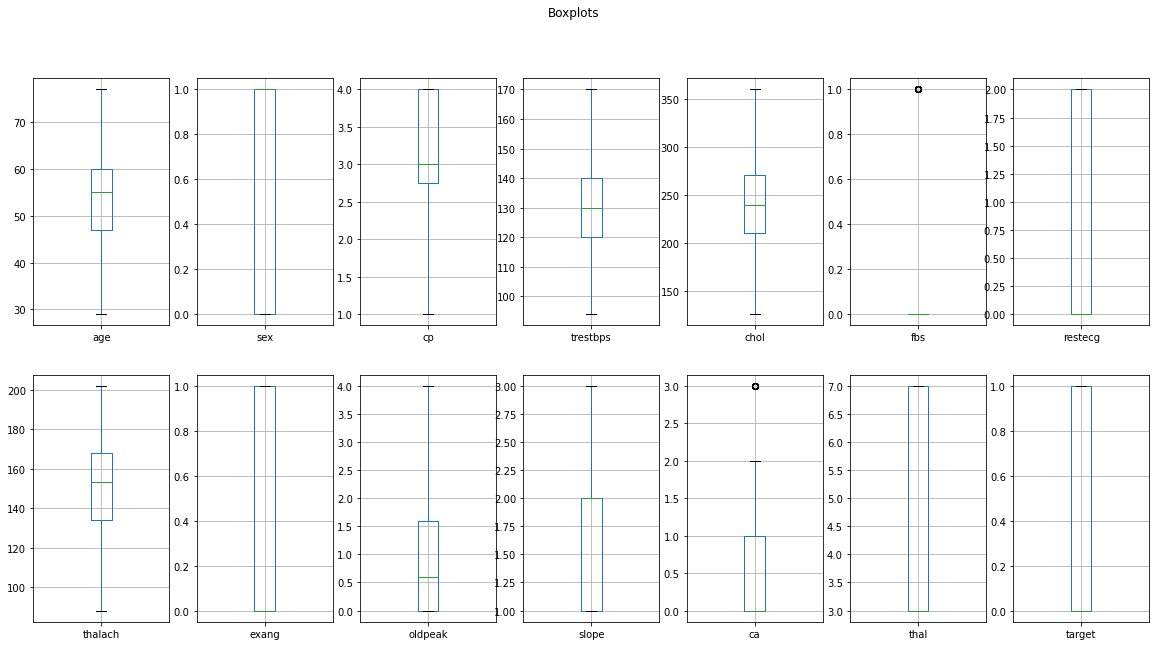

In [53]:
# Boxplot of each column to visualise the distribution of data
data.plot(kind='box', 
          subplots=True, 
          sharex=False, 
          sharey=False, 
          layout=(2, 7), 
          figsize=(20, 10), 
          title='Boxplots', 
          grid=True, 
          fontsize=10);

#### Identify outliers

In [54]:
continuous_variables = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']  

def drop_outliers(extracted_data, drop=False):
    for feature in extracted_data.columns:
        feature_data = extracted_data[feature]
        
        # Quartile 1 - 25th percentile of data
        Q1 = np.percentile(feature_data, 25)
        
        # Quartile 3 - 75th percentile of data
        Q3 = np.percentile(feature_data, 75)
        
        # Interquartile range
        IQR = Q3 - Q1
        
        # Significant outliers: low outliers are below Q1 - 1.5IQR and high outliers are above Q3 + 1.5IQR
        low_outlier = Q1 - IQR * 1.5
        high_outlier = Q3 + IQR * 1.5

        outliers = feature_data[((feature_data < low_outlier) | (feature_data > high_outlier))].index
        if drop == False:
            print(f'There are {len(outliers)} outliers for the feature {feature}')
            print(outliers)
        if drop == True:
            # For duplicate indexes in the list, error is ignored and remaining indexes are dropped 
            data.drop(outliers, inplace=True, errors='ignore')
            print(f'{len(outliers)} Outliers from feature {feature} are removed')
            print(outliers)

drop_outliers(data[continuous_variables])

There are 0 outliers for the feature age
Int64Index([], dtype='int64')
There are 0 outliers for the feature trestbps
Int64Index([], dtype='int64')
There are 0 outliers for the feature chol
Int64Index([], dtype='int64')
There are 0 outliers for the feature thalach
Int64Index([], dtype='int64')
There are 0 outliers for the feature oldpeak
Int64Index([], dtype='int64')


In [55]:
# Drop outliers
drop_outliers(data[continuous_variables], drop=True)

0 Outliers from feature age are removed
Int64Index([], dtype='int64')
0 Outliers from feature trestbps are removed
Int64Index([], dtype='int64')
0 Outliers from feature chol are removed
Int64Index([], dtype='int64')
0 Outliers from feature thalach are removed
Int64Index([], dtype='int64')
0 Outliers from feature oldpeak are removed
Int64Index([], dtype='int64')


In [56]:
data.shape

(284, 14)

### Distributions

#### Age Variable (`age`)

58    18
57    17
54    15
60    12
59    12
52    12
51    11
44    11
41    10
64     9
62     9
56     9
63     8
61     8
53     8
45     8
42     8
43     8
46     7
67     7
50     7
65     7
48     7
55     6
66     6
47     5
49     5
70     4
39     4
35     4
69     3
68     3
40     3
71     3
37     2
38     2
34     2
76     1
29     1
74     1
77     1
Name: age, dtype: int64


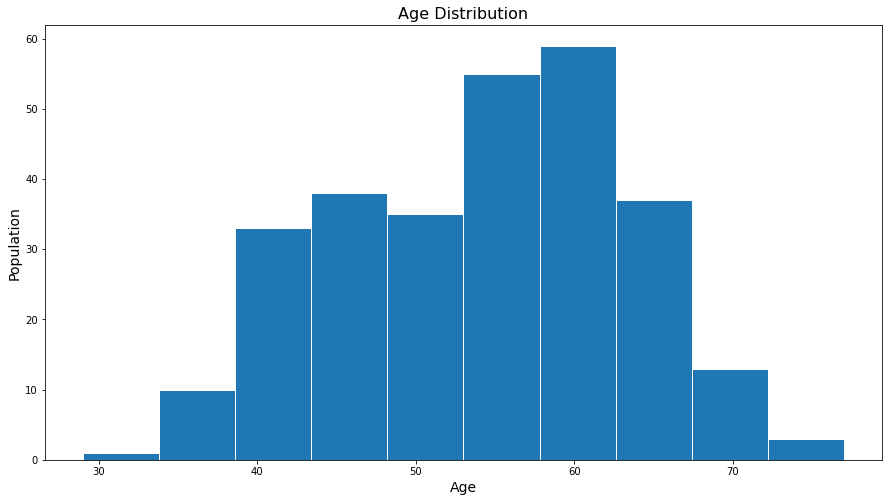

In [57]:
# Number of instances for each attribute in the 'age' column
print(data['age'].value_counts())

# Plot histogram
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_facecolor('white')
ax = data['age'].hist(edgecolor='white').plot(kind='bar')
ax = list(ax)

# Formatting the graph
plt.title('Age Distribution', fontsize=16)
plt.ylabel('Population', fontsize=14)
plt.xlabel('Age', fontsize=14)
plt.grid(False)

plt.show()

Most of the patients in this study are in their 50s and 60s. The mean age is 54 years olds, where the youngest patient is 29 years old and the oldest is 77 years old.

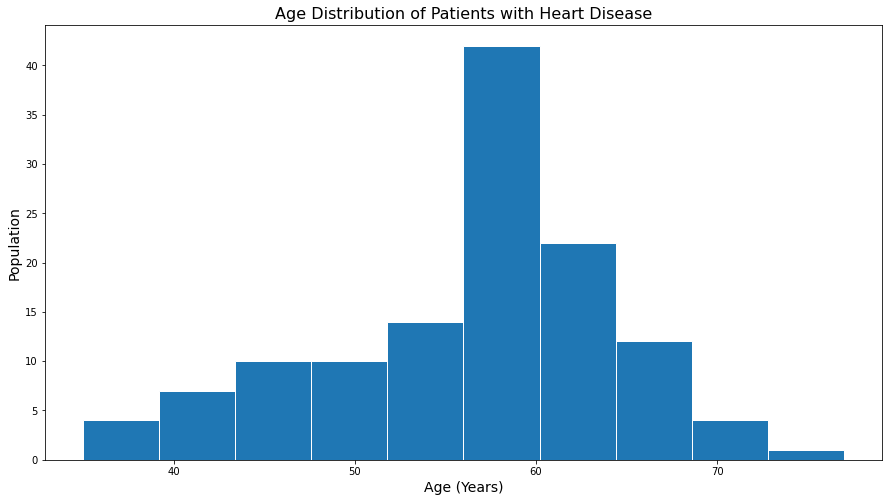

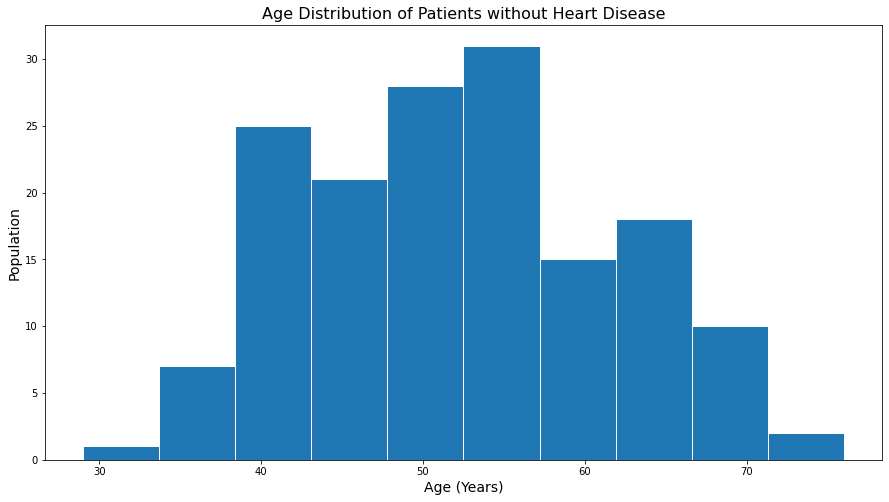

In [58]:
# No_Disease = 0, Disease = 1
no_HD = data[data['target'] == 0]
HD = data[data['target'] == 1]

# Plot of the age distribution of heart disease sufferers
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_facecolor('white')
ax = HD['age'].hist(edgecolor='white').plot(kind='bar')

# Formatting the graph
plt.title('Age Distribution of Patients with Heart Disease', fontsize=16)
plt.ylabel('Population', fontsize=14)
plt.xlabel('Age (Years)', fontsize=14)
plt.grid(False)


# Plot of the age distribution of patients who did not suffer from heart disease
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_facecolor('white')
ax = no_HD['age'].hist(edgecolor='white').plot(kind='bar')

# Formatting the graph
plt.title('Age Distribution of Patients without Heart Disease', fontsize=16)
plt.ylabel('Population', fontsize=14)
plt.xlabel('Age (Years)', fontsize=14)
plt.grid(False)

plt.show()

It is a fairly normal distribution for those with and without heart disease. 

In the first plot, the highest population of ages affected by heart disease are centered around the middle of the distribution. Then there are smaller populations of ages affected on either side of the center.

With these two plots, it is unclear to fully understand if age affects the presence of heart disease. This is because the patients in their 50s and 60s are probably over-represented, while the youngest and oldest patients are under-represented in this dataset.

#### Sex Variable (`sex`)

1    198
0     86
Name: sex, dtype: int64


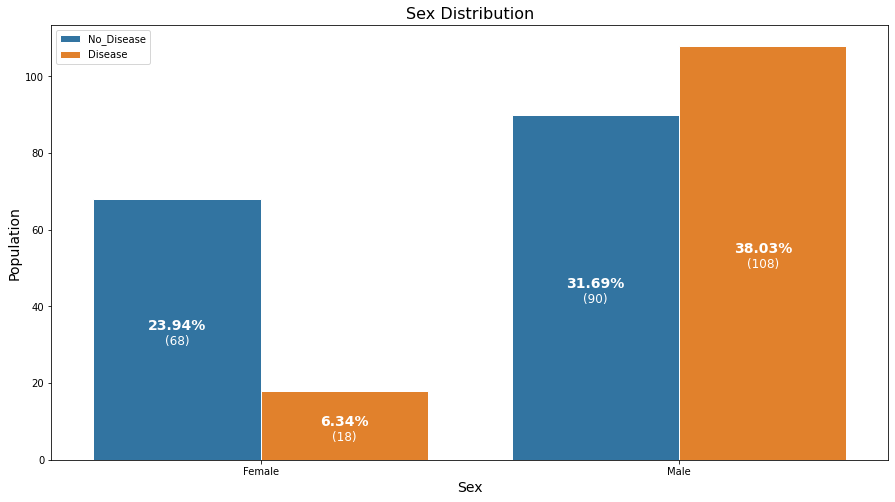

In [59]:
# Number of instances for each attribute in the 'sex' column
print(data['sex'].value_counts())

# Plot bar chart according to each gender
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.countplot(x='sex', hue='target', data=data, edgecolor=sns.color_palette(["#FFFFFF"]))
# No_Disease = 0, Disease = 1
ax.legend(labels=['No_Disease', 'Disease'])

# Formatting the graph
ax.set_title('Sex Distribution', fontsize=16)
ax.set_ylabel('Population', fontsize=14)
ax.set_xticklabels(['Female', 'Male'], rotation=0)
ax.set_xlabel('Sex', fontsize=14)

totals = []  # Contains the number of instances for each attribute
for l in ax.patches:
    height = l.get_height()
    totals.append(height)
total = sum(totals)

# Arrange text within bars
for l in ax.patches:
    width = l.get_width()
    height = l.get_height()
    x, y = l.get_xy()
    ax.annotate(f'({height})', (x + width / 2, y + height / 2 - 4), ha='center', fontsize=12, color='white')
    ax.annotate(f'{round((height / total) * 100, 2)}%', (x + width / 2, y + height / 2), ha='center', 
                fontsize=14, color='white', weight='bold')

plt.show()

There are more males among the patients with heart disease than females. Also, there is a higher proportion of males with heart disease than without heart disease compared to the female population.

#### Chest Pain Variable (`cp`)

4    131
3     82
2     49
1     22
Name: cp, dtype: int64


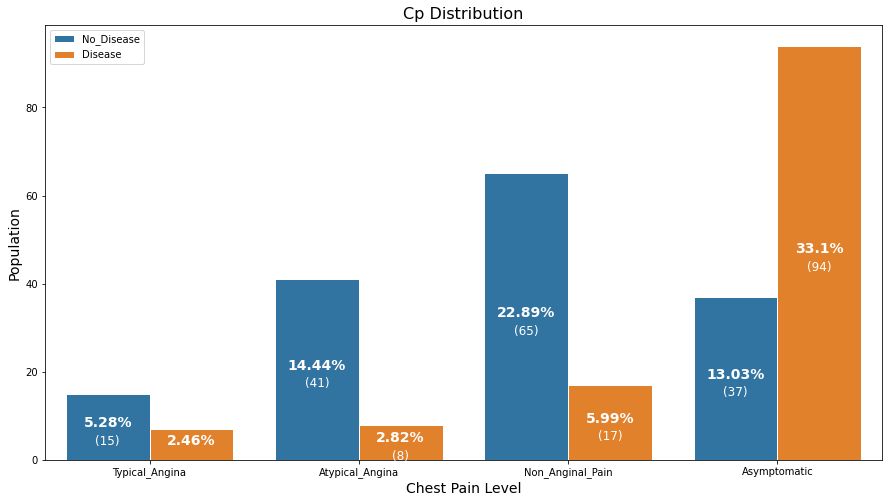

In [60]:
#  Number of instances for each attribute in the 'cp' column
print(data['cp'].value_counts())

# Plot bar chart according to each gender
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.countplot(x='cp', hue='target', data=data, edgecolor=sns.color_palette(["#FFFFFF"]))
# No_Disease = 0, Disease = 1
ax.legend(labels=['No_Disease', 'Disease'])

# Formatting the graph
ax.set_title('Cp Distribution', fontsize=16)
ax.set_ylabel('Population', fontsize=14)
ax.set_xticklabels(['Typical_Angina', 'Atypical_Angina', 'Non_Anginal_Pain', 'Asymptomatic'], rotation=0)
ax.set_xlabel('Chest Pain Level', fontsize=14)

totals = []  # Contains the number of instances for each attribute
for l in ax.patches:
    height = l.get_height()
    totals.append(height)
total = sum(totals)

# Arrange text within bars
for l in ax.patches:
    width = l.get_width()
    height = l.get_height()
    x, y = l.get_xy()
    ax.annotate(f'({height})', (x + width / 2, y + height / 2 - 4), ha='center', fontsize=12, color='white')
    ax.annotate(f'{round((height / total) * 100, 2)}%', (x + width / 2, y + height / 2), ha='center', 
                fontsize=14, color='white', weight='bold')

plt.show()

Chest pain / angina is discomfort caused when there is an insufficient amount of oxygen and blood flow reaching the heart, triggering pain through the arms, shoulders, neck, etc. and tightness in the chest.

The bar graph suggests a higher number of patients with no heart disease have typical angina, possibly due to age, gender, physical activity, stress etc. Those with the disease tend to have atypical symptoms, chest pain not caused by the lack of oxygen or even no symptoms at all.

#### Resting Blood Pressure Variable (`trestbps`)

130    36
120    36
140    28
110    19
150    16
128    12
138    12
125    11
160    10
112     9
132     8
118     7
108     6
135     6
124     6
145     5
152     5
134     4
100     4
170     4
122     4
136     3
126     3
105     3
142     3
146     2
144     2
102     2
148     2
94      2
115     2
106     1
117     1
104     1
123     1
154     1
155     1
156     1
158     1
101     1
164     1
165     1
129     1
Name: trestbps, dtype: int64


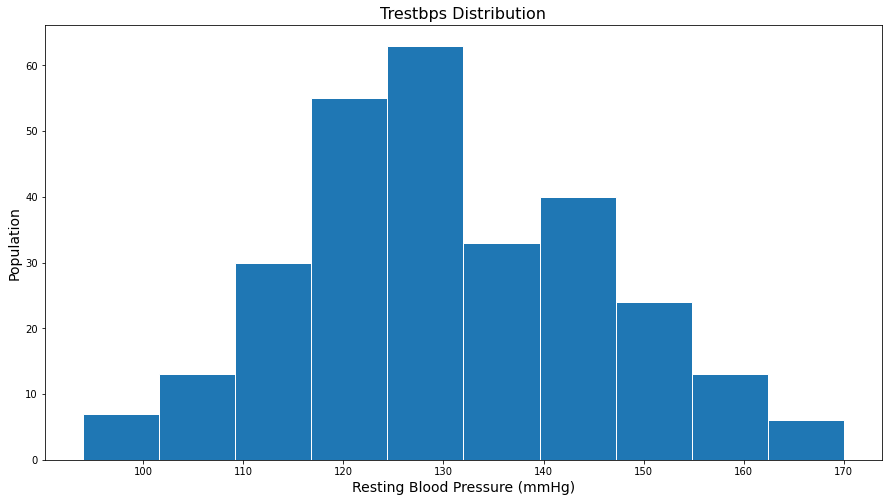

In [61]:
# Number of instances for each attribute in the 'trestbps' column
print(data['trestbps'].value_counts())

# Plot histogram
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_facecolor('white')
ax = data['trestbps'].hist(edgecolor='white').plot(kind='bar')

# Formatting the graph
plt.title('Trestbps Distribution', fontsize=16)
plt.ylabel('Population', fontsize=14)
plt.xlabel('Resting Blood Pressure (mmHg)', fontsize=14)
plt.grid(False)
    
plt.show()

#### Cholesterol Variable (`chol`)

197    6
204    6
234    6
269    5
212    5
      ..
224    1
215    1
210    1
200    1
360    1
Name: chol, Length: 143, dtype: int64


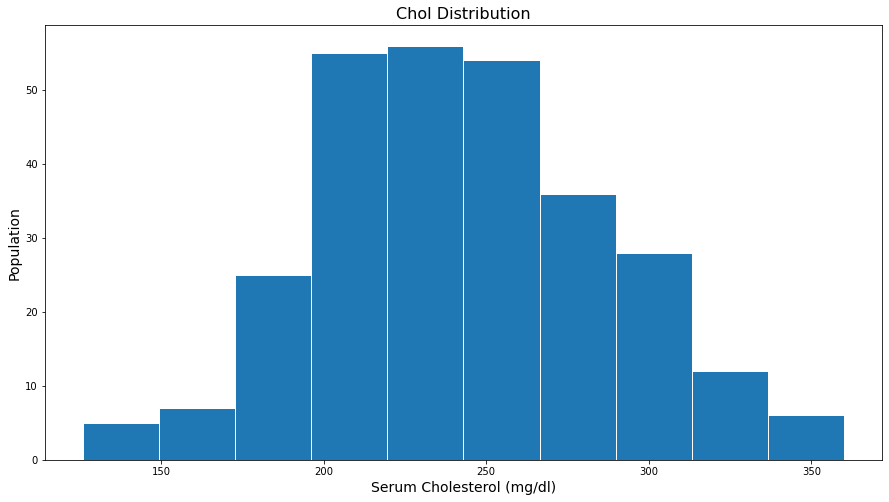

In [62]:
# Number of instances for each attribute in the 'chol' column
print(data['chol'].value_counts())

# Plot histogram
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_facecolor('white')
ax = data['chol'].hist(edgecolor='white').plot(kind='bar')

# Formatting the graph
plt.title('Chol Distribution', fontsize=16)
plt.ylabel('Population', fontsize=14)
plt.xlabel('Serum Cholesterol (mg/dl)', fontsize=14)
plt.grid(False)
    
plt.show()

#### Fasting Blood Sugar Variable (`fbs`)

0    244
1     40
Name: fbs, dtype: int64


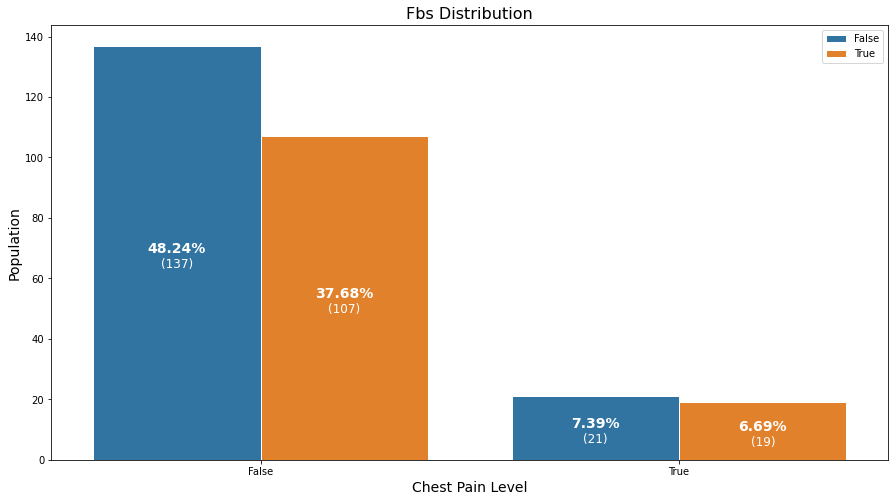

In [63]:
#  Number of instances for each attribute in the 'fbs' column
print(data['fbs'].value_counts())

# Plot bar chart according to each gender
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.countplot(x='fbs', hue='target', data=data, edgecolor=sns.color_palette(["#FFFFFF"]))
# False = 0, True = 1
ax.legend(labels=['False', 'True'])

# Formatting the graph
ax.set_title('Fbs Distribution', fontsize=16)
ax.set_ylabel('Population', fontsize=14)
ax.set_xticklabels(['False', 'True'], rotation=0)
ax.set_xlabel('Chest Pain Level', fontsize=14)

totals = []  # Contains the number of instances for each attribute
for l in ax.patches:
    height = l.get_height()
    totals.append(height)
total = sum(totals)

# Arrange text within bars
for l in ax.patches:
    width = l.get_width()
    height = l.get_height()
    x, y = l.get_xy()
    ax.annotate(f'({height})', (x + width / 2, y + height / 2 - 5), ha='center', fontsize=12, color='white')
    ax.annotate(f'{round((height / total) * 100, 2)}%', (x + width / 2, y + height / 2), ha='center', 
                fontsize=14, color='white', weight='bold')

plt.show()

#### ECG Variable (`restecg`)

0    144
2    138
1      2
Name: restecg, dtype: int64


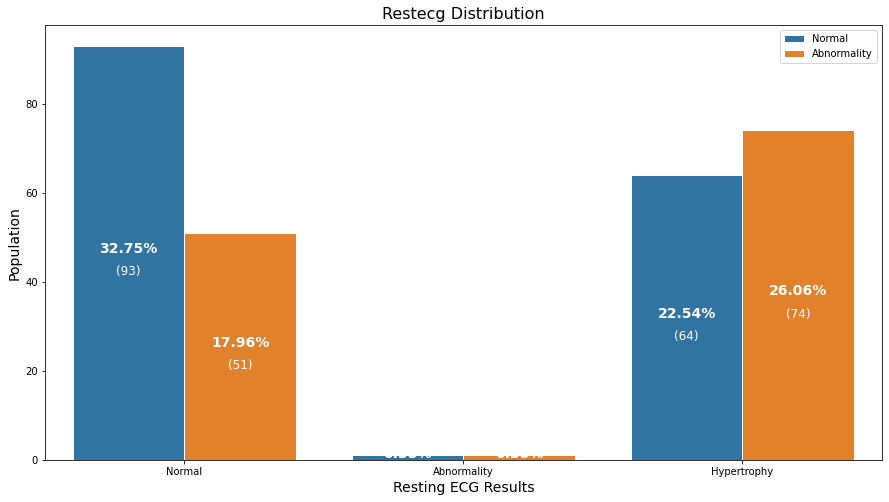

In [64]:
#  Number of instances for each attribute in the 'restecg' column
print(data['restecg'].value_counts())

# Plot bar chart according to each gender
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.countplot(x='restecg', hue='target', data=data, edgecolor=sns.color_palette(["#FFFFFF"]))
# Normal = 0, Abnormality = 1, Hypertrophy = 2
ax.legend(labels=['Normal', 'Abnormality', 'Hypertrophy'])

# Formatting the graph
ax.set_title('Restecg Distribution', fontsize=16)
ax.set_ylabel('Population', fontsize=14)
ax.set_xticklabels(['Normal', 'Abnormality', 'Hypertrophy'], rotation=0)
ax.set_xlabel('Resting ECG Results', fontsize=14)

totals = []  # Contains the number of instances for each attribute
for l in ax.patches:
    height = l.get_height()
    totals.append(height)
total = sum(totals)

# Arrange text within bars
for l in ax.patches:
    width = l.get_width()
    height = l.get_height()
    x, y = l.get_xy()
    ax.annotate(f'({height})', (x + width / 2, y + height / 2 - 5), ha='center', fontsize=12, color='white')
    ax.annotate(f'{round((height / total) * 100, 2)}%', (x + width / 2, y + height / 2), ha='center', 
                fontsize=14, color='white', weight='bold')

plt.show()

#### Maximum Heart Rate Variable (`thalach`)

162    10
163     9
160     8
152     8
172     7
       ..
129     1
133     1
134     1
137     1
202     1
Name: thalach, Length: 88, dtype: int64


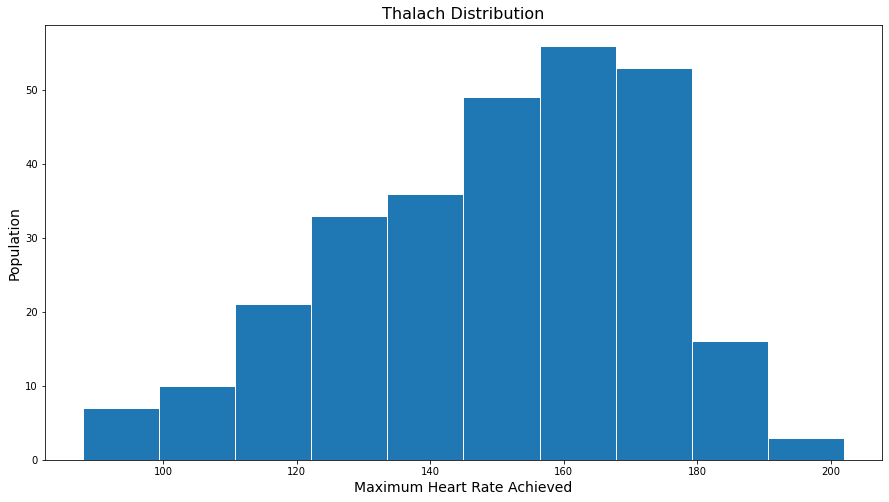

In [65]:
# Number of instances for each attribute in the 'thalach' column
print(data['thalach'].value_counts())

# Plot histogram
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_facecolor('white')
ax = data['thalach'].hist(edgecolor='white').plot(kind='bar')

# Formatting the graph
plt.title('Thalach Distribution', fontsize=16)
plt.ylabel('Population', fontsize=14)
plt.xlabel('Maximum Heart Rate Achieved', fontsize=14)
plt.grid(False)
    
plt.show()

#### Angina due to Exercise Variable (`exang`)

0    194
1     90
Name: exang, dtype: int64


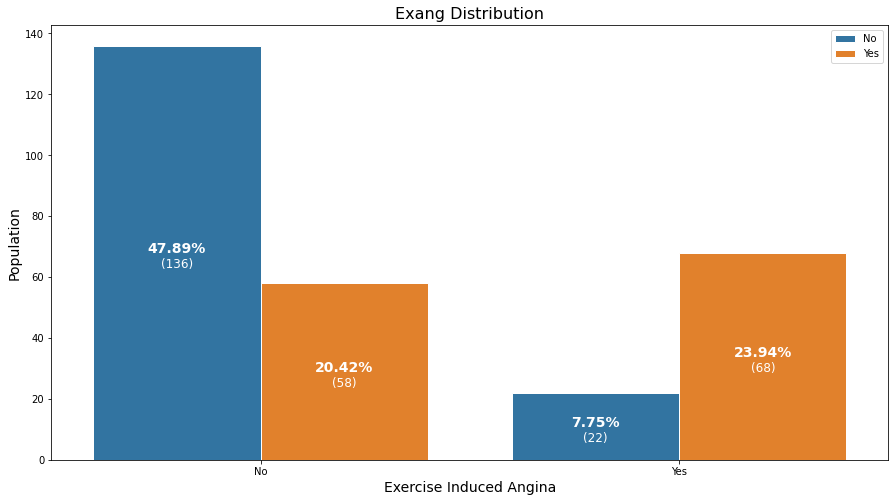

In [66]:
#  Number of instances for each attribute in the 'exang' column
print(data['exang'].value_counts())

# Plot bar chart according to each gender
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.countplot(x='exang', hue='target', data=data, edgecolor=sns.color_palette(["#FFFFFF"]))
# No = 0, Yes = 1
ax.legend(labels=['No', 'Yes'])

# Formatting the graph
ax.set_title('Exang Distribution', fontsize=16)
ax.set_ylabel('Population', fontsize=14)
ax.set_xticklabels(['No', 'Yes'], rotation=0)
ax.set_xlabel('Exercise Induced Angina', fontsize=14)

totals = []  # Contains the number of instances for each attribute
for l in ax.patches:
    height = l.get_height()
    totals.append(height)
total = sum(totals)

# Arrange text within bars
for l in ax.patches:
    width = l.get_width()
    height = l.get_height()
    x, y = l.get_xy()
    ax.annotate(f'({height})', (x + width / 2, y + height / 2 - 5), ha='center', fontsize=12, color='white')
    ax.annotate(f'{round((height / total) * 100, 2)}%', (x + width / 2, y + height / 2), ha='center', 
                fontsize=14, color='white', weight='bold')

plt.show()

#### ST Depression Variable (`oldpeak`)

0.0    96
1.2    16
0.6    14
1.4    13
0.8    12
1.0    12
0.2    12
1.8    10
1.6     9
0.4     9
2.0     9
0.1     7
2.6     6
2.8     6
1.5     5
3.0     5
1.9     4
0.5     4
2.2     4
3.6     4
0.3     3
0.9     3
2.4     3
1.1     2
3.2     2
2.5     2
3.4     2
2.3     2
3.8     1
1.3     1
4.0     1
3.5     1
3.1     1
2.9     1
0.7     1
2.1     1
Name: oldpeak, dtype: int64


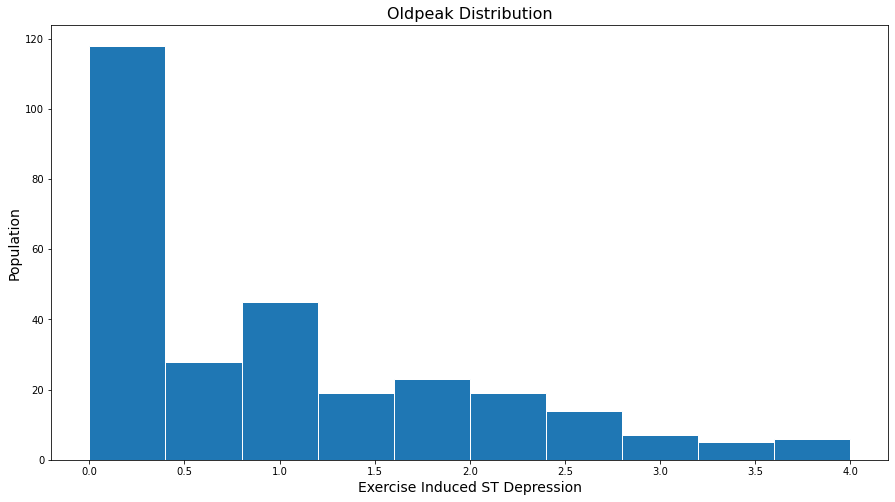

In [67]:
# Number of instances for each attribute in the 'oldpeak' column
print(data['oldpeak'].value_counts())

# Plot histogram
fig, ax = plt.subplots(figsize=(15, 8))
ax.set_facecolor('white')
ax = data['oldpeak'].hist(edgecolor='white').plot(kind='bar')

# Formatting the graph
plt.title('Oldpeak Distribution', fontsize=16)
plt.ylabel('Population', fontsize=14)
plt.xlabel('Exercise Induced ST Depression', fontsize=14)
plt.grid(False)
    
plt.show()

#### Slope Variable (`slope`)

1    138
2    130
3     16
Name: slope, dtype: int64


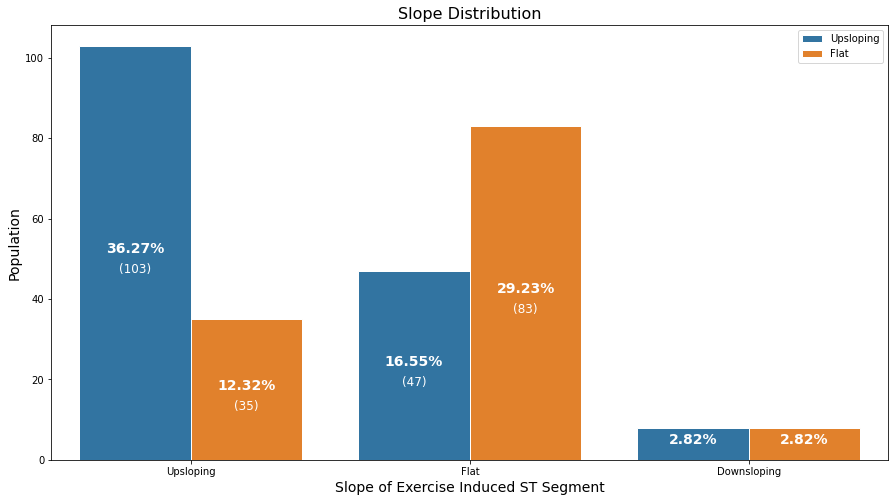

In [68]:
#  Number of instances for each attribute in the 'slope' column
print(data['slope'].value_counts())

# Plot bar chart according to each gender
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.countplot(x='slope', hue='target', data=data, edgecolor=sns.color_palette(["#FFFFFF"]))
# Upsloping = 0, Flat = 1, Downsloping = 2
ax.legend(labels=['Upsloping', 'Flat', 'Downsloping'])

# Formatting the graph
ax.set_title('Slope Distribution', fontsize=16)
ax.set_ylabel('Population', fontsize=14)
ax.set_xticklabels(['Upsloping', 'Flat', 'Downsloping'], rotation=0)
ax.set_xlabel('Slope of Exercise Induced ST Segment', fontsize=14)

totals = []  # Contains the number of instances for each attribute
for l in ax.patches:
    height = l.get_height()
    totals.append(height)
total = sum(totals)

# Arrange text within bars
for l in ax.patches:
    width = l.get_width()
    height = l.get_height()
    x, y = l.get_xy()
    ax.annotate(f'({height})', (x + width / 2, y + height / 2 - 5), ha='center', fontsize=12, color='white')
    ax.annotate(f'{round((height / total) * 100, 2)}%', (x + width / 2, y + height / 2), ha='center', 
                fontsize=14, color='white', weight='bold')

plt.show()

#### Major Vessels Variable (`ca`)

0    170
1     63
2     35
3     16
Name: ca, dtype: int64


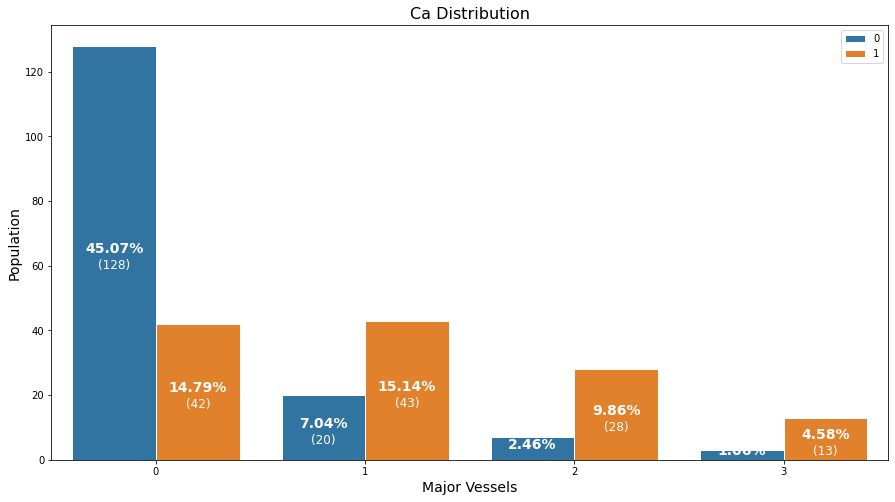

In [70]:
#  Number of instances for each attribute in the 'ca' column
print(data['ca'].value_counts())

# Plot bar chart according to each gender
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.countplot(x='ca', hue='target', data=data, edgecolor=sns.color_palette(["#FFFFFF"]))
ax.legend(labels=['0', '1', '2', '3'])

# Formatting the graph
ax.set_title('Ca Distribution', fontsize=16)
ax.set_ylabel('Population', fontsize=14)
ax.set_xticklabels(['0', '1', '2', '3'], rotation=0)
ax.set_xlabel('Major Vessels', fontsize=14)

totals = []  # Contains the number of instances for each attribute
for l in ax.patches:
    height = l.get_height()
    totals.append(height)
total = sum(totals)

# Arrange text within bars
for l in ax.patches:
    width = l.get_width()
    height = l.get_height()
    x, y = l.get_xy()
    ax.annotate(f'({height})', (x + width / 2, y + height / 2 - 5), ha='center', fontsize=12, color='white')
    ax.annotate(f'{round((height / total) * 100, 2)}%', (x + width / 2, y + height / 2), ha='center', 
                fontsize=14, color='white', weight='bold')

plt.show()

#### Thalassemia Variable (`thal`)

3    162
7    105
6     17
Name: thal, dtype: int64


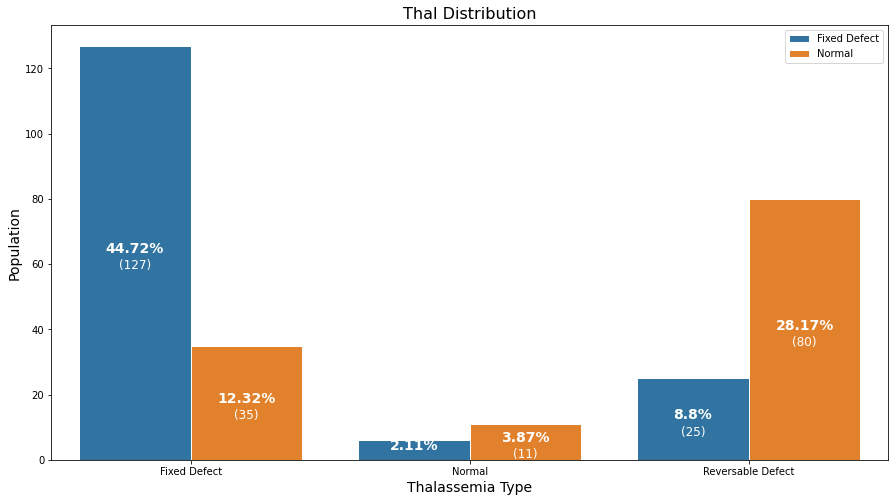

In [71]:
#  Number of instances for each attribute in the 'thal' column
print(data['thal'].value_counts())

# Plot bar chart according to each gender
fig, ax = plt.subplots(figsize=(15, 8))
ax = sns.countplot(x='thal', hue='target', data=data, edgecolor=sns.color_palette(["#FFFFFF"]))
# Fixed Defect = 1, Normal = 2, Reversable Defect = 3
ax.legend(labels=['Fixed Defect', 'Normal', 'Reversable Defect'])

# Formatting the graph
ax.set_title('Thal Distribution', fontsize=16)
ax.set_ylabel('Population', fontsize=14)
ax.set_xticklabels(['Fixed Defect', 'Normal', 'Reversable Defect'], rotation=0)
ax.set_xlabel('Thalassemia Type', fontsize=14)

totals = []  # Contains the number of instances for each attribute
for l in ax.patches:
    height = l.get_height()
    totals.append(height)
total = sum(totals)

# Arrange text within bars
for l in ax.patches:
    width = l.get_width()
    height = l.get_height()
    x, y = l.get_xy()
    ax.annotate(f'({height})', (x + width / 2, y + height / 2 - 5), ha='center', fontsize=12, color='white')
    ax.annotate(f'{round((height / total) * 100, 2)}%', (x + width / 2, y + height / 2), ha='center', 
                fontsize=14, color='white', weight='bold')

plt.show()

#### Target Variable

0    158
1    126
Name: target, dtype: int64


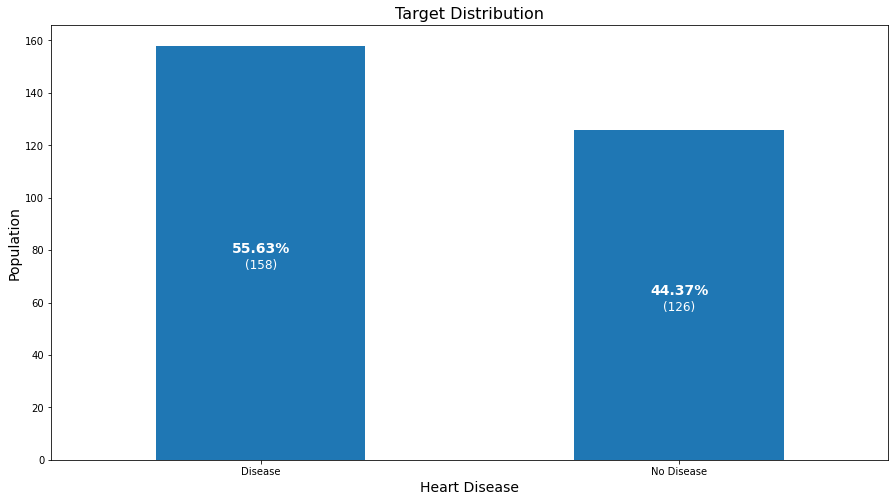

In [72]:
# Number of instances for each attribute in the 'target' column
print(data['target'].value_counts())

# Plot bar chart
fig, ax = plt.subplots(figsize=(15, 8))
name = ['Disease', 'No Disease']
ax = data['target'].value_counts().plot(kind='bar')

# Formatting the graph
ax.set_title('Target Distribution', fontsize=16)
ax.set_ylabel('Population', fontsize=14)
ax.set_xticklabels(name, rotation=0)
ax.set_xlabel('Heart Disease', fontsize=14)

totals = []  # Contains the number of instances for each attribute
for l in ax.patches:
    height = l.get_height()
    totals.append(height)
total = sum(totals)

# Arrange text within bars
for l in ax.patches:
    width = l.get_width()
    height = l.get_height()
    x, y = l.get_xy()
    ax.annotate(f'({height})', (x + width / 2, y + height / 2 - 6), ha='center', fontsize=12, color='white')
    ax.annotate(f'{round((height / total) * 100, 2)}%', (x + width / 2, y + height / 2), ha='center', 
                fontsize=14, color='white', weight='bold')

plt.show()

In [73]:
data = data.to_csv('heart_data.csv', index=False)